#### Load the dataset.

In [1]:

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import power_transform
from sklearn.preprocessing import StandardScaler

df = pd.read_csv('../dataset/original-noneeg-dataset.csv', sep='|')


#### Display the dataset size.

In [3]:

df.shape


(41992, 2)

#### Display dataset data types.

In [4]:

df.dtypes


hr       float64
label      int64
dtype: object

#### Verify the first rows of the dataset.
- Electrocardiogram measurements were recorded with up to 16 decimal places.

In [5]:

pd.set_option('display.precision', 16)


In [6]:

df.head()


,hr,label
0,89.0007629629406125,0
1,88.0001373334940666,0
2,87.0004425185865387,0
3,87.0004425185865387,0
4,87.0004425185865387,0


#### Display dataset statistics.

In [7]:

df.describe()


,hr,label
count,41992.0000000000000000,41992.0000000000000000
mean,76.8914885332083315,0.8573061535530577
std,15.1457339736439778,1.1249165832349102
min,48.0001831111374244,0.0000000000000000
25%,65.0002136295822055,0.0000000000000000
50%,75.0000610371448460,0.0000000000000000
75%,86.0007477036790107,2.0000000000000000
max,134.0000000000000000,3.0000000000000000


#### Check for missing data.
- There is not missing data.

In [8]:

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41992 entries, 0 to 41991
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   hr      41992 non-null  float64
 1   label   41992 non-null  int64  
dtypes: float64(1), int64(1)
memory usage: 656.2 KB


#### Check for cells with zero values in features.
- hr feature has no zero values.

In [9]:

df[df["hr"] == 0].count()


hr       0
label    0
dtype: int64

#### Generate target histogram to check class distribution.

array([[<Axes: title={'center': 'label'}>]], dtype=object)

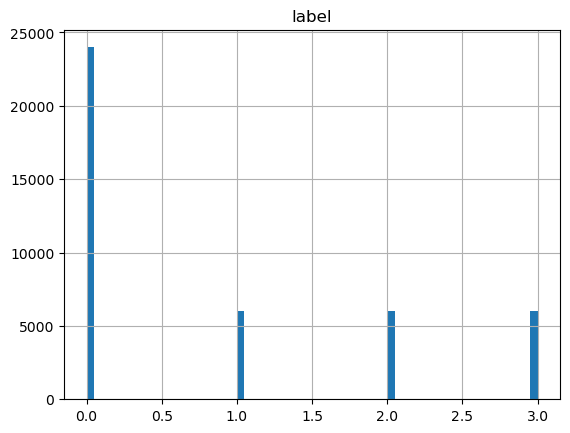

In [2]:

df.hist(bins = 60, column = ["label"])


#### Check for class imbalance.
- The dataset is very unbalanced.
- There will be need to undersampling data for model training.

In [11]:

instances_count = df['label'].value_counts().sum()
class_distribution = df['label'].value_counts().to_dict()
for key, value in class_distribution.items() :
    print(f"Class = {key:2.0f}   Qty = {value:6.0f}   Percentage = {(value / instances_count * 100):.2f} %")


Class =  0   Qty =  23992   Percentage = 57.13 %
Class =  1   Qty =   6000   Percentage = 14.29 %
Class =  2   Qty =   6000   Percentage = 14.29 %
Class =  3   Qty =   6000   Percentage = 14.29 %


#### Check for Skewness of hr feature.
- The data distribution is skewed (positive). It is not a standardized normal distribution.

In [12]:

print("Skewness for hr is {}".format(df["hr"].astype(float).skew()))


Skewness for hr is 0.6857014259711747


#### Check for Kurtosis of hr feature.

In [13]:

print("Kurtosis for hr is {}".format(df["hr"].astype(float).kurt()))


Kurtosis for hr is 0.0571975257577968


#### Generate a histogram to visualize data distribution (skewness).

array([[<Axes: title={'center': 'hr'}>]], dtype=object)

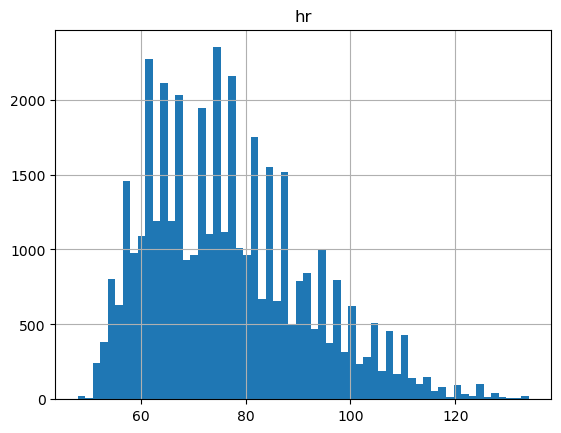

In [25]:

df.hist(bins = 60, column = ["hr"])


#### Apply MinMaxScaler normalization to try to normalize the data distribution.

,hr
count,41992.0000000000000000
mean,0.3359461271809354
std,0.1761135607209151
min,0.0000000000000000
25%,0.1976751943601682
50%,0.3139527373750031
75%,0.4418679709707947
max,1.0000000000000000


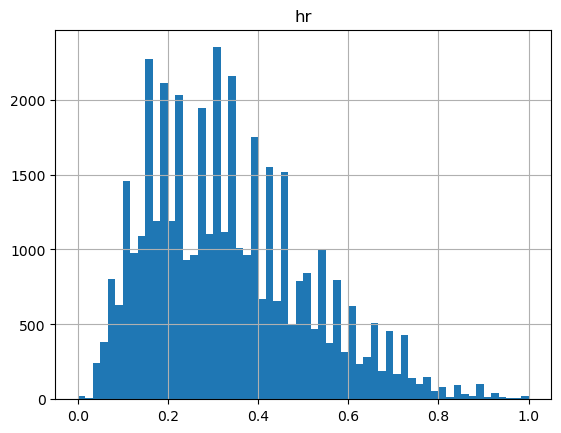

In [15]:

scaler = MinMaxScaler()
scaled_mms = scaler.fit_transform(df[["hr"]]) 
scaled_mms = pd.DataFrame(scaled_mms, columns = ["hr"])
scaled_mms.hist(bins = 60)
scaled_mms.describe()


#### Apply StandardScaler normalization to try to normalize the data distribution.

,hr
count,41992.0000000000000000
mean,0.0000000000000003
std,1.0000119072425866
min,-1.9075767135578323
25%,-0.7851330623280637
50%,-0.1248833513815460
75%,0.6014477510610184
max,3.7706453560492110


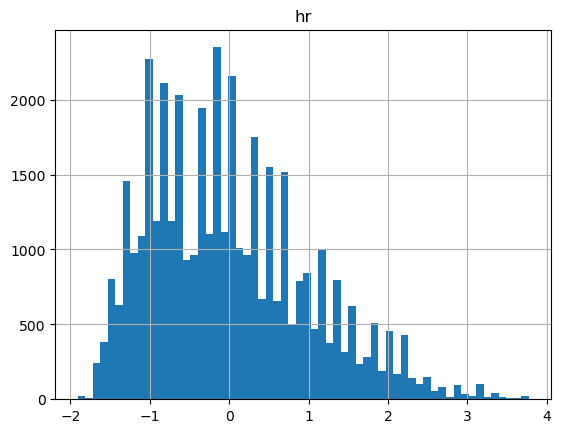

In [16]:

scaler = StandardScaler()
scaled_sts = scaler.fit_transform(df[["hr"]]) 
scaled_sts = pd.DataFrame(scaled_sts, columns = ["hr"])
scaled_sts.hist(bins = 60)
scaled_sts.describe()


#### Apply Log normalization to try to normalize the data distribution.

                           hr
count  41992.0000000000000000
mean       4.3237932638268681
std        0.1913932756385739
min        3.8712048257159775
25%        4.1743905564991932
50%        4.3174889273645771
75%        4.4543559904445384
max        4.8978397999509111


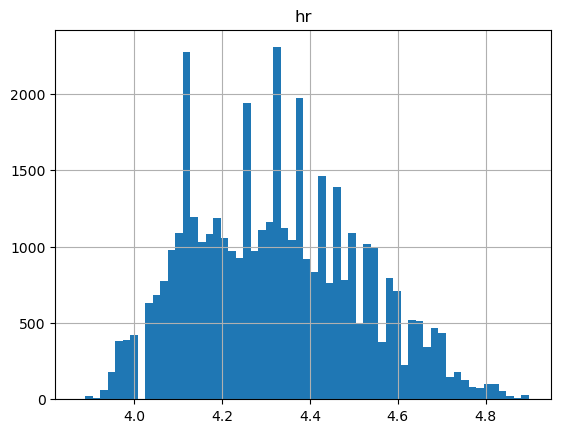

In [17]:

log_df = pd.DataFrame(df["hr"], columns = ["hr"])
log_df["hr"] = np.log(log_df["hr"])
log_df.hist(bins = 60)
print(log_df.describe())


#### Apply Box-Cox transformation to try to normalize the data distribution.
- Box-cox reached better results than the other methods.

                           hr
count  41992.0000000000000000
mean       0.0000000000000043
std        1.0000119072425506
min       -2.7042813130048460
25%       -0.7647486203932197
50%        0.0279406425567721
75%        0.7211519284406521
max        2.5924684852805679


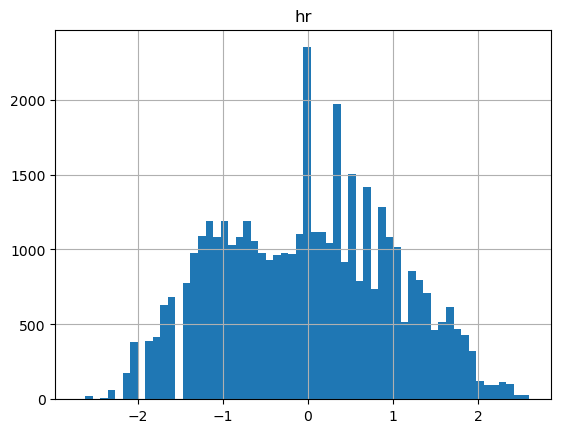

In [18]:

bc_df = power_transform(df[["hr"]], method = "box-cox")
bc_df = pd.DataFrame(bc_df, columns = ["hr"])
bc_df.hist(bins = 60)
print(bc_df.describe())


#### Generate a dataframe for each of the classes to check the descriptive statistics per class.

In [19]:

stress_tasks_list = ["relaxation", "physical stress", "cognitive stress", "emotional stress"]
for count in range(0, 4):
    df_each_class = df.loc[df["label"] == count]
    print("\nDataset description for class {} ({})".format(count, stress_tasks_list[count]))
    print(df_each_class.describe().loc[["mean", "min", "max"]])



Dataset description for class 0 (relaxation)
                        hr  label
mean   72.2455977603546557    0.0
min    48.0001831111374244    0.0
max   130.0000000000000000    0.0

Dataset description for class 1 (physical stress)
                        hr  label
mean   94.2892581916897967    1.0
min    51.0008697776056721    1.0
max   134.0000000000000000    1.0

Dataset description for class 2 (cognitive stress)
                        hr  label
mean   82.2185706656245117    2.0
min    53.0006866664672529    2.0
max   129.9999694817682325    2.0

Dataset description for class 3 (emotional stress)
                        hr  label
mean   72.7440053127758688    3.0
min    50.0000305185132916    3.0
max   110.9996337779709847    3.0


#### Generate the histogram to visualize the data distribution for class 0.

array([[<Axes: title={'center': 'hr'}>]], dtype=object)

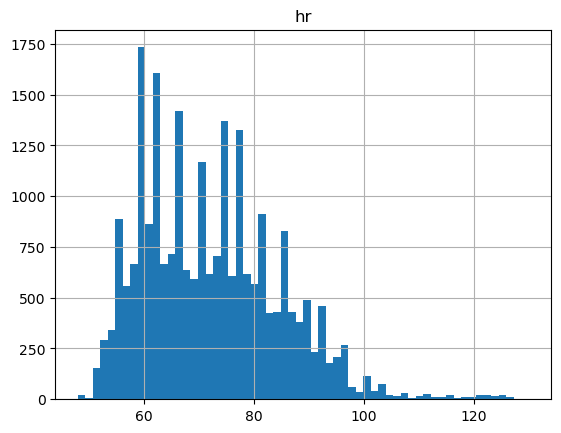

In [28]:

df.loc[df["label"] == 0].hist(bins = 60, column = ["hr"])


#### Generate the histogram to visualize the data distribution for class 1.

array([[<Axes: title={'center': 'hr'}>]], dtype=object)

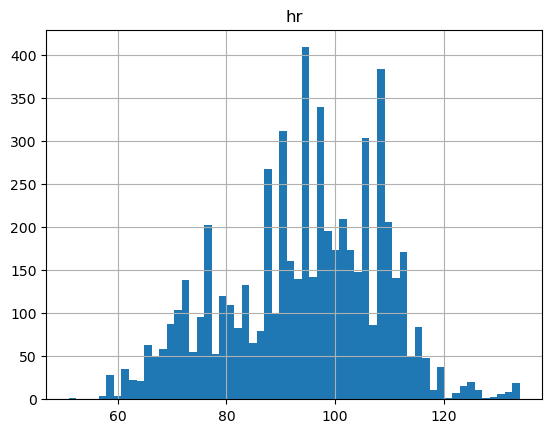

In [29]:

df.loc[df["label"] == 1].hist(bins = 60, column = ["hr"])


#### Generate the histogram to visualize the data distribution for class 2.

array([[<Axes: title={'center': 'hr'}>]], dtype=object)

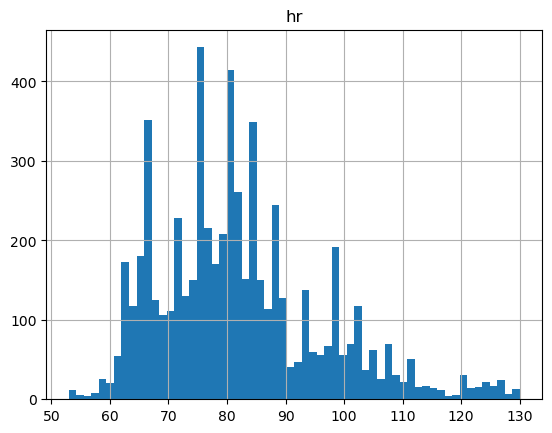

In [30]:

df.loc[df["label"] == 2].hist(bins = 60, column = ["hr"])


#### Generate the histogram to visualize the data distribution for class 3.

array([[<Axes: title={'center': 'hr'}>]], dtype=object)

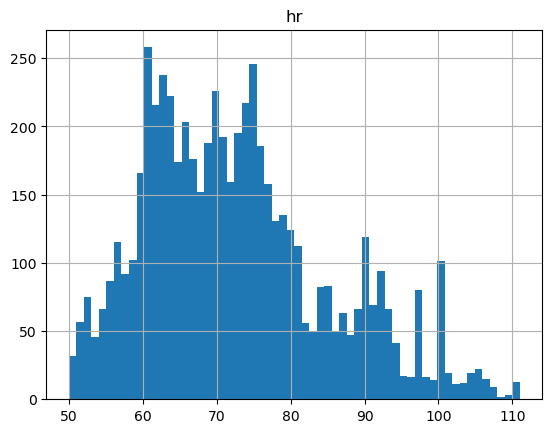

In [31]:

df.loc[df["label"] == 3].hist(bins = 60, column = ["hr"])


#### Plot graphs with the measurements  obtained during the execution of the tasks by individuals 1 and 2 to exemplify the variations observed in the data.

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

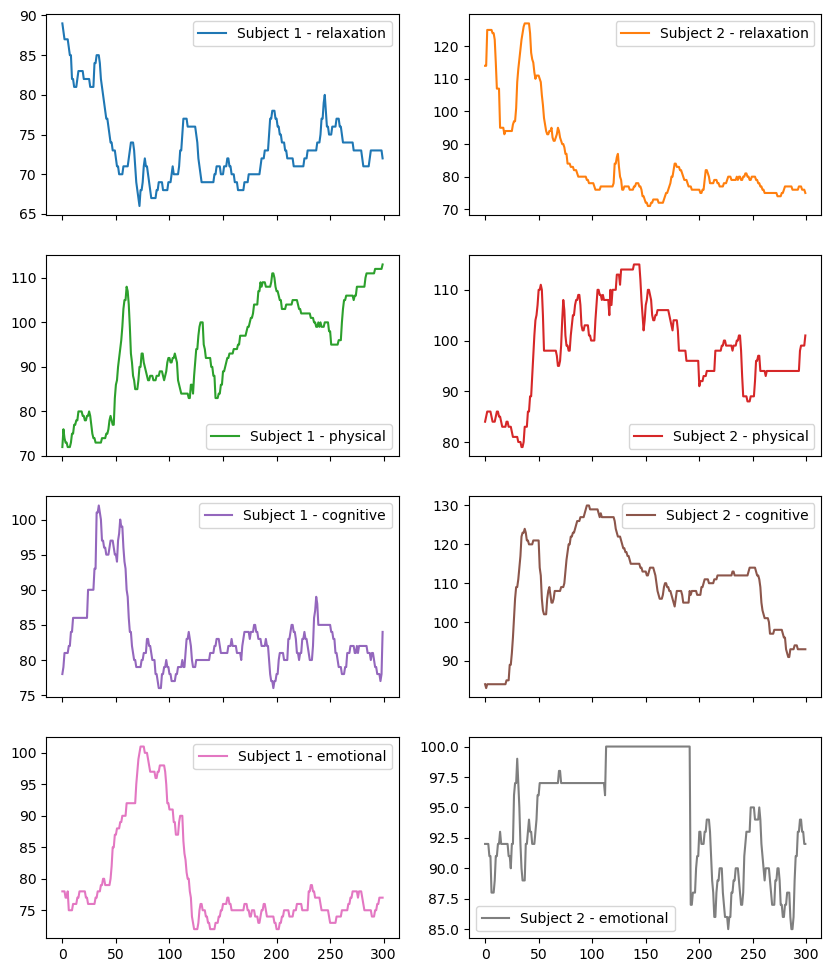

In [28]:

class_zero_values = df.loc[df["label"] == 0]["hr"].to_numpy()
class_one_values = df.loc[df["label"] == 1]["hr"].to_numpy()
class_two_values = df.loc[df["label"] == 2]["hr"].to_numpy()
class_three_values = df.loc[df["label"] == 3]["hr"].to_numpy()
line_graph_df = pd.DataFrame(columns = ["Subject 1 - relaxation", "Subject 2 - relaxation",
                                        "Subject 1 - physical", "Subject 2 - physical",
                                        "Subject 1 - cognitive", "Subject 2 - cognitive",
                                        "Subject 1 - emotional", "Subject 2 - emotional"])
line_graph_df["Subject 1 - relaxation"] = class_zero_values[0: 300]
line_graph_df["Subject 2 - relaxation"] = class_zero_values[300: 600]
line_graph_df["Subject 1 - physical"] = class_one_values[0: 300]
line_graph_df["Subject 2 - physical"] = class_one_values[300: 600]
line_graph_df["Subject 1 - cognitive"] = class_two_values[0: 300]
line_graph_df["Subject 2 - cognitive"] = class_two_values[300: 600]
line_graph_df["Subject 1 - emotional"] = class_three_values[0: 300]
line_graph_df["Subject 2 - emotional"] = class_three_values[300: 600]
line_graph_df.plot(subplots = True, layout=(4, 2), figsize=(10, 12))
